In [21]:
# Assignment_3
# Name: Keshav Goyal
# Roll No: 21BEC2297
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import numpy as np

In [30]:
df = pd.read_csv('/content/penguins_size.csv') # Importing the dataset

In [4]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


<Axes: >

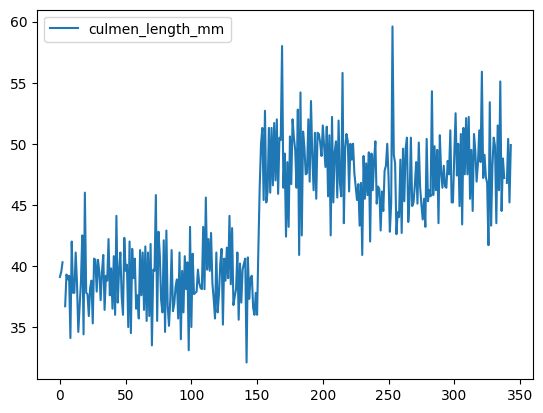

In [5]:
# Univariate Analysis
df.loc[:, ['culmen_length_mm']].plot()

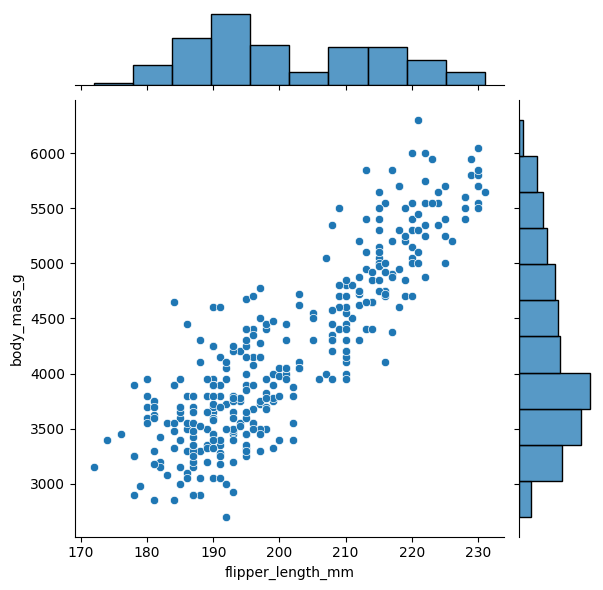

In [6]:
# Bi- Variate Analysis
sns.jointplot(x='flipper_length_mm', y='body_mass_g',data=df)

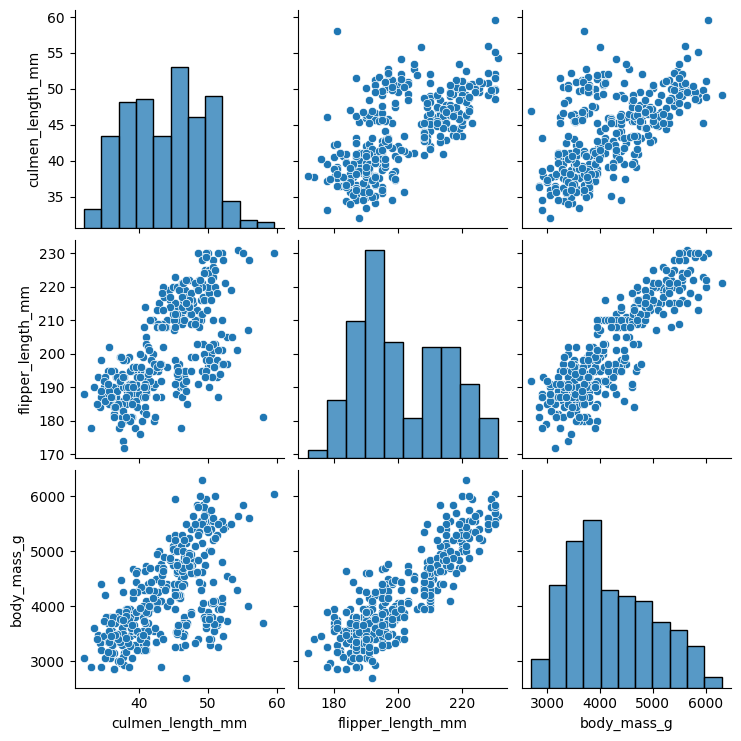

In [7]:
# Multi-Variate Analysis
sns.pairplot(df.loc[:,['culmen_length_mm','flipper_length_mm','body_mass_g']])

In [8]:
df.describe() # Descriptive statistics

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [31]:
df.isnull().any() # checking is there any null values in our dataset

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [32]:
# Deleting rows with Null values
df=df.dropna()
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


<ipython-input-34-8d2012ab2219>:7: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


<Axes: >

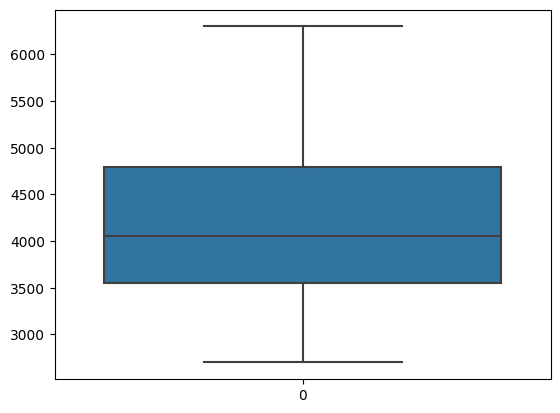

In [34]:
# Outlier detection and removal
q1 = df.body_mass_g.quantile(0.25) #Q1
q3 = df.body_mass_g.quantile(0.75) #Q3
IQR = q3-q1
upper_limit = q3+1.5*IQR
lower_limit =q1-1.5*IQR
df.median()
df['body_mass_g'] = np.where(df['body_mass_g']>upper_limit,4050,df['body_mass_g'])
df['body_mass_g'] = np.where(df['body_mass_g']<lower_limit,4050,df['body_mass_g'])
sns.boxplot(df.body_mass_g)